In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#How to add the file to gdrive

1. Open the drive link shared
2. Click the three dots next to ***HV-AI-2024*** and select 'Make a copy'

In [3]:
#!ls drive/MyDrive
!cp drive/MyDrive/HV-AI-2024_2.zip /content/HV-AI-2024.zip
!unzip HV-AI-2024.zip
!rm -rf /content/__MACOSX
!mv /content/HV-AI-2024/* /content/
!rm -rf /content/HV-AI-2024
!rm /content/HV-AI-2024.zip
!rm -rf /content/sample_data
from google.colab import output
#output.clear()

Streaming output truncated to the last 5000 lines.
  inflating: HV-AI-2024/images/train/84_4878.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._84_4878.jpg  
  inflating: HV-AI-2024/images/train/16_894.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._16_894.jpg  
  inflating: HV-AI-2024/images/train/43_2439.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._43_2439.jpg  
  inflating: HV-AI-2024/images/train/68_3954.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._68_3954.jpg  
  inflating: HV-AI-2024/images/train/116_6753.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._116_6753.jpg  
  inflating: HV-AI-2024/images/train/18_974.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._18_974.jpg  
  inflating: HV-AI-2024/images/train/115_6674.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._115_6674.jpg  
  inflating: HV-AI-2024/images/train/37_2090.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._37_2090.jpg  
  inflating: HV-AI-2024/images/train/111_6483

# **Plot Sample Images**

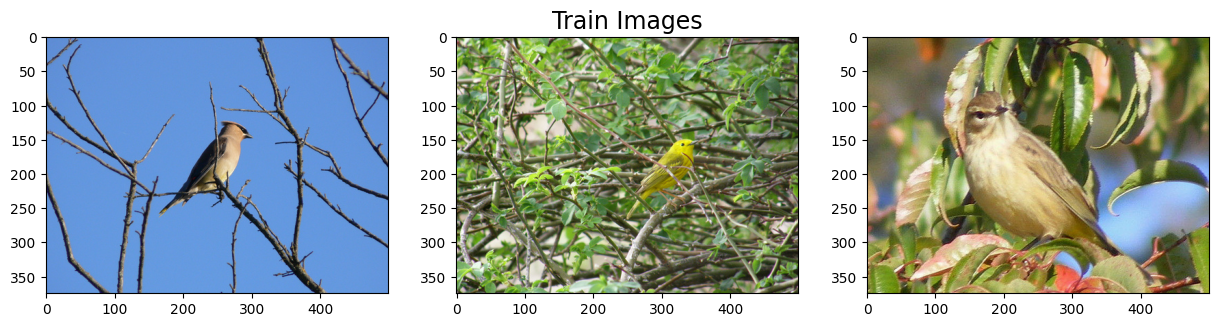

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob


train_images = glob('images/train/*.jpg')[0:3]
test_images = glob('images/test/*.jpg')[0:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(train_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Train Images',fontsize=17)
plt.show()

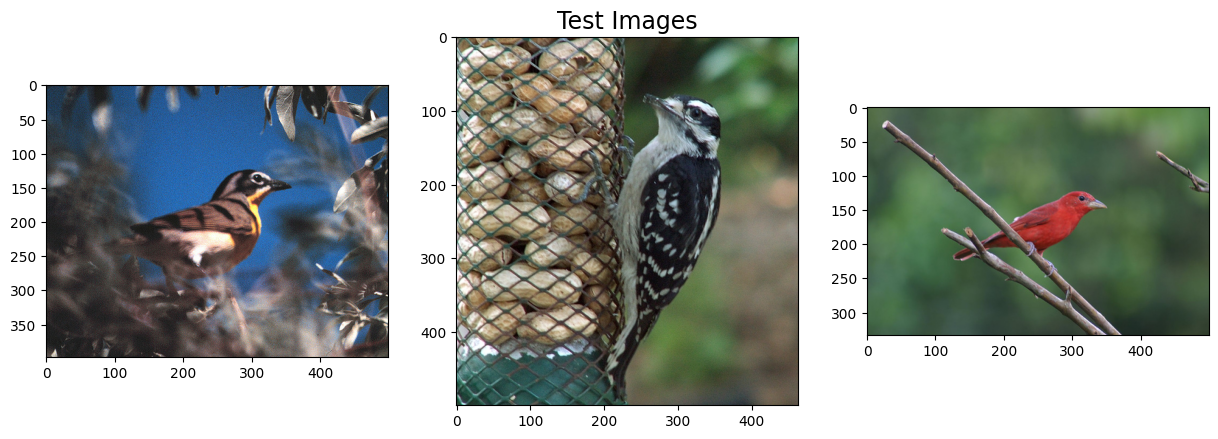

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(test_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Test Images',fontsize=17)
plt.show()

# **Load/Preprocess **data****

In [19]:
import pandas as pd
x_train=pd.read_csv('train.csv')
x_train[['x_min', 'y_min', 'x_max', 'y_max']] = x_train['bbox'].str.split(' ', expand=True)

In [122]:
x_test=pd.read_csv('test.csv')
x_test[['x_min', 'y_min', 'x_max', 'y_max']] = x_test['bbox'].str.split(' ', expand=True)
x_test.head()

path                     bbox  x_min  y_min  x_max  \
0    images/test/test_81.jpg  241.0 113.0 202.0 257.0  241.0  113.0  202.0   
1  images/test/test_1592.jpg  119.0 121.0 294.0 337.0  119.0  121.0  294.0   
2   images/test/test_565.jpg    33.0 45.0 237.0 139.0   33.0   45.0  237.0   
3  images/test/test_2078.jpg    58.0 95.0 262.0 210.0   58.0   95.0  262.0   
4  images/test/test_3645.jpg   32.0 141.0 348.0 281.0   32.0  141.0  348.0   

   y_max  
0  257.0  
1  337.0  
2  139.0  
3  210.0  
4  281.0

In [89]:
x_train['class'].value_counts()


class
0      30
149    30
124    30
126    30
127    30
       ..
125    29
189    29
106    29
140    29
195    29
Name: count, Length: 200, dtype: int64

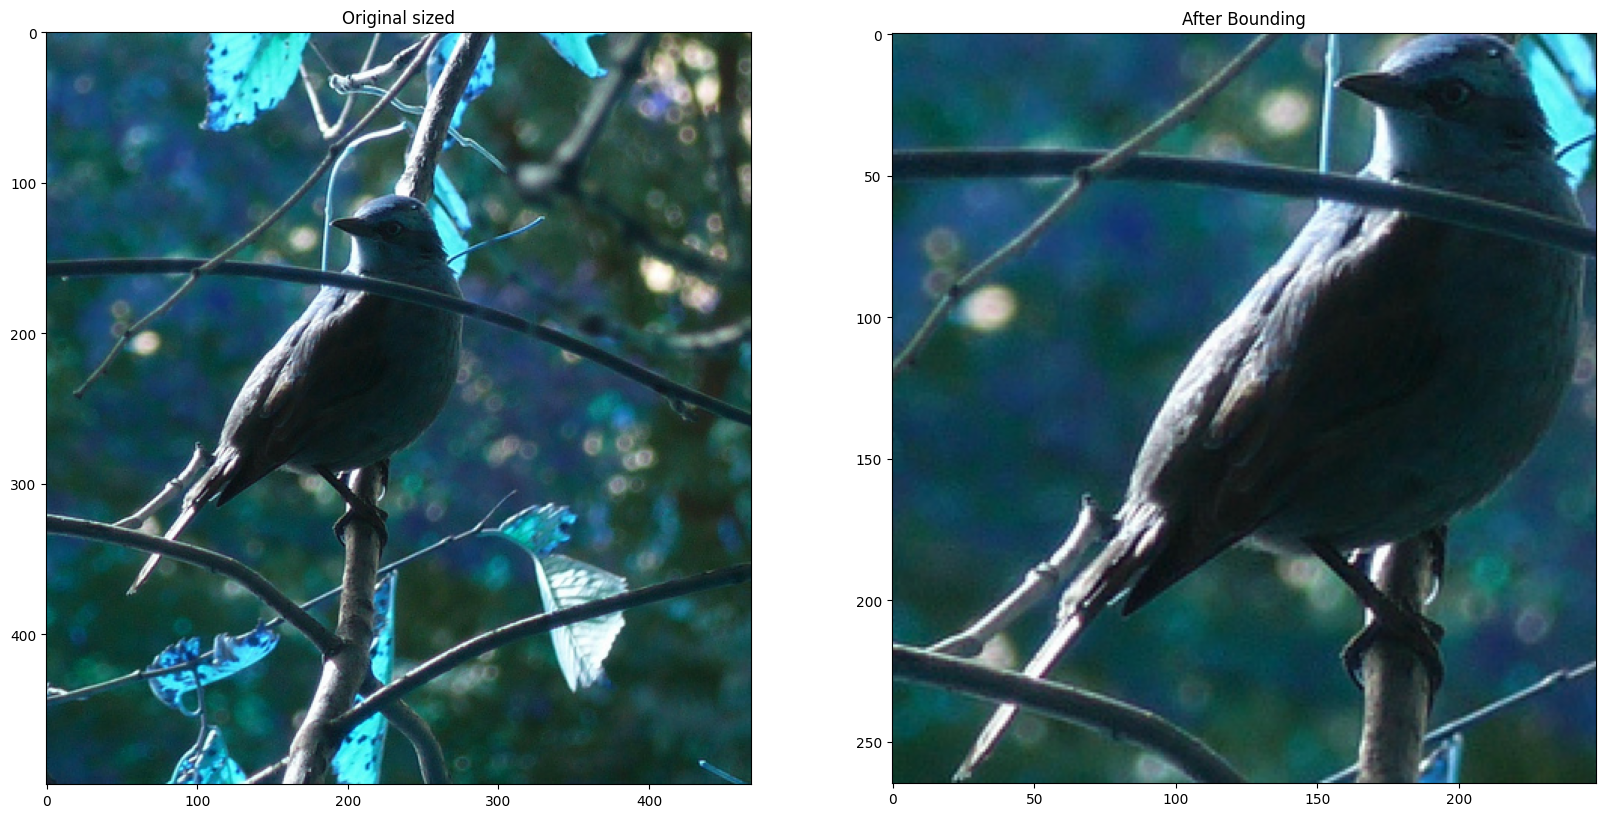

In [120]:
i=320
x, y = int(float(x_train['x_min'][i])), int(float(x_train['y_min'][i]))
w, h = int(float(x_train['x_max'][i])), int(float(x_train['y_max'][i]))
fig, axes = plt.subplots(1, 2, figsize=(20,10))
img = cv2.imread(x_train['path'][i])
axes[0].set_title('Original sized')
axes[1].set_title('After Bounding')
axes[0].imshow(img)

cropped_image = img[y:y+h, x:x+w]
axes[1].imshow(cropped_image)
plt.show()

In [104]:
  import os
  import cv2


  folder_path = ''

  for i in range(len(x_train)):
      foldername = x_train['path'][i].split('/')[0]
      imgname = x_train['path'][i].split('/')[2]

      path = os.path.join(folder_path, x_train['path'][i])

      x, y = int(float(x_train['x_min'][i])), int(float(x_train['y_min'][i]))
      w, h = int(float(x_train['x_max'][i])), int(float(x_train['y_max'][i]))
      output_folder = f"data/train/imagee"
      output_folder = os.path.join(output_folder,str(x_train['class'][i]))
      print(output_folder)
      if not os.path.exists(output_folder):
          os.makedirs(output_folder)

      img = cv2.imread(path)
      if img is not None:
          cropped_image = img[y:y+h, x:x+w]

          cv2.imwrite(f"{output_folder}/{imgname}", cropped_image)
      else:
          print(f"Failed to load image: {path}")

Streaming output truncated to the last 5000 lines.
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/33
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data/train/imagee/34
data

In [126]:
  import os
  import cv2
  folder_path = ''

  for i in range(len(x_test)):
      foldername = x_test['path'][i].split('/')[0]
      imgname = x_test['path'][i].split('/')[2]
      path = os.path.join(folder_path, x_test['path'][i])
      x, y = int(float(x_test['x_min'][i])), int(float(x_test['y_min'][i]))
      w, h = int(float(x_test['x_max'][i])), int(float(x_test['y_max'][i]))
      output_folder = f"data/train/image_test"
      print(output_folder)
      if not os.path.exists(output_folder):
          os.makedirs(output_folder)
      img = cv2.imread(path)
      if img is not None:
          cropped_image = img[y:y+h,x:x+w]
          cv2.imwrite(f"{output_folder}/{imgname}", cropped_image)
      else:
          print(f"Failed to load image: {path}")

Streaming output truncated to the last 5000 lines.
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
data/train/image_test
dat

In [127]:
!ls data/train/image_test

test_1000.jpg  test_1871.jpg  test_2740.jpg  test_360.jpg   test_447.jpg   test_5349.jpg
test_1001.jpg  test_1872.jpg  test_2741.jpg  test_3610.jpg  test_4480.jpg  test_534.jpg
test_1002.jpg  test_1873.jpg  test_2742.jpg  test_3611.jpg  test_4481.jpg  test_5350.jpg
test_1003.jpg  test_1874.jpg  test_2743.jpg  test_3612.jpg  test_4482.jpg  test_5351.jpg
test_1004.jpg  test_1875.jpg  test_2744.jpg  test_3613.jpg  test_4483.jpg  test_5352.jpg
test_1005.jpg  test_1876.jpg  test_2745.jpg  test_3614.jpg  test_4484.jpg  test_5353.jpg
test_1006.jpg  test_1877.jpg  test_2746.jpg  test_3615.jpg  test_4485.jpg  test_5354.jpg
test_1007.jpg  test_1878.jpg  test_2747.jpg  test_3616.jpg  test_4486.jpg  test_5355.jpg
test_1008.jpg  test_1879.jpg  test_2748.jpg  test_3617.jpg  test_4487.jpg  test_5356.jpg
test_1009.jpg  test_187.jpg   test_2749.jpg  test_3618.jpg  test_4488.jpg  test_5357.jpg
test_100.jpg   test_1880.jpg  test_274.jpg   test_3619.jpg  test_4489.jpg  test_5358.jpg
test_1010.jpg  test_18

In [105]:
!ls data/train/imagee



0    107  116  125  134  143  152  161	170  18   189  198  27	36  45	54  63	72  81	90
1    108  117  126  135  144  153  162	171  180  19   199  28	37  46	55  64	73  82	91
10   109  118  127  136  145  154  163	172  181  190  2    29	38  47	56  65	74  83	92
100  11   119  128  137  146  155  164	173  182  191  20   3	39  48	57  66	75  84	93
101  110  12   129  138  147  156  165	174  183  192  21   30	4   49	58  67	76  85	94
102  111  120  13   139  148  157  166	175  184  193  22   31	40  5	59  68	77  86	95
103  112  121  130  14	 149  158  167	176  185  194  23   32	41  50	6   69	78  87	96
104  113  122  131  140  15   159  168	177  186  195  24   33	42  51	60  7	79  88	97
105  114  123  132  141  150  16   169	178  187  196  25   34	43  52	61  70	8   89	98
106  115  124  133  142  151  160  17	179  188  197  26   35	44  53	62  71	80  9	99


In [54]:
IMG_SIZE = (32, 32)
BATCH_SIZE = 1024


In [108]:
train_path = "data/train/imagee/"


In [131]:
test_path="data/train/image_test/"

# **Model initialization/Training**

In [109]:
import tensorflow as tf
train_data = tf.keras.utils.image_dataset_from_directory(train_path,
                seed=1337,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

class_names = train_data.class_names
print(class_names)
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_data).numpy())
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.prefetch(buffer_size=AUTOTUNE)

Found 5994 files belonging to 200 classes.
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48

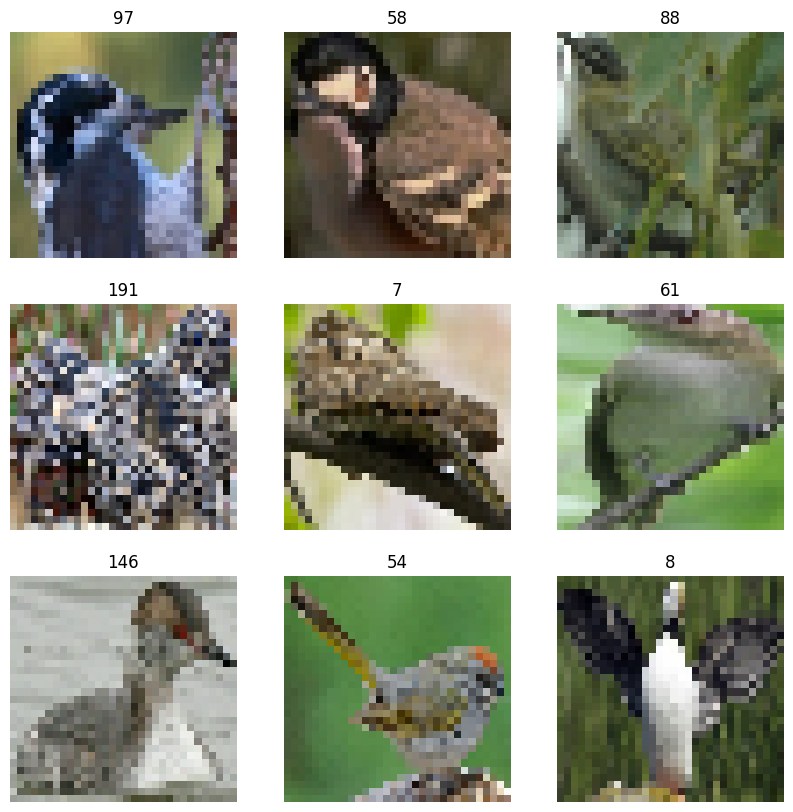

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [111]:
from keras.layers import Dropout
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(265, activation='relu'),
    tf.keras.layers.Dense(265, activation='relu'),
    tf.keras.layers.Dense(200, activation='sigmoid')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 265)                 │         135,945 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 265)                 │          70,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 200)                 │          53,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,684,723 (56.02 MB)

 Trainable params: 14,684,723 (56.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [112]:
from tensorflow.keras.applications.resnet import ResNet101
base_model = ResNet101(include_top=False, input_shape=(32, 32, 3), classes= 200)
base_model.trainable = False    #Freeze all Layers of ResNET
base_model.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 42,658,176 (162.73 MB)

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
model_freeze = base_model.layers[-1].output
model_freeze = Flatten()(model_freeze)
model_freeze = Dense(1024, activation='relu')(model_freeze)
model_freeze = Dense(1024, activation='relu')(model_freeze)
model_freeze = Dropout(0.4)(model_freeze)
model_freeze = Dense(512, activation='relu')(model_freeze)
model_freeze = Dense(512, activation='relu')(model_freeze)
model_freeze = Dropout(0.4)(model_freeze)
model_freeze = Dense(512, activation='relu')(model_freeze)
model_freeze = Dense(512, activation='relu')(model_freeze)
model_freeze = Dropout(0.4)(model_freeze)
model_freeze = Dense(201, activation='softmax')(model_freeze)

model_freeze = Model(inputs=base_model.input, outputs=model_freeze)

model_freeze.compile(loss = "sparse_categorical_crossentropy",optimizer='Adam' ,metrics=['accuracy'])
model_freeze.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 47,221,833 (180.14 MB)

 Trainable params: 4,563,657 (17.41 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

# **Model Inference**

In [117]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
history1 = model_freeze.fit(
    train_data,
    epochs=5,
    callbacks=[
        tensorboard_callback,
        EarlyStopping(monitor='loss', patience=10)
    ]
)


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 58s 10s/step - accuracy: 0.9232 - loss: 0.2567
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.9251 - loss: 0.2399
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.9241 - loss: 0.2407
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step - accuracy: 0.9250 - loss: 0.2413
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step - accuracy: 0.9299 - loss: 0.2374


In [135]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

def load_and_preprocess_image(image_path, target_size=(32, 32)):
    img = cv2.imread(image_path)

    if img is not None:
        img_resized = cv2.resize(img, target_size)
        return img_resized
    else:
        print(f"Failed to load image: {image_path}")
        return None
test_path = "data/train/image_test/"

image_files = [os.path.join(test_path, fname) for fname in os.listdir(test_path) if fname.endswith(('.png', '.jpg', '.jpeg'))]

image_paths = []
processed_images = []

for image_file in image_files:
    img = load_and_preprocess_image(image_file)
    if img is not None:
        image_paths.append(image_file)
        processed_images.append(img)

x_test_preprocessed = np.array(processed_images)
predictions = model_freeze.predict(x_test_preprocessed)

predicted_labels = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)
results_df = pd.DataFrame({
    'path': image_paths,
    'predicted_label': predicted_labels,
    'confidence_score': confidence_scores
})



182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 275ms/step


(5794, 3)

In [144]:
results_df['path'] = results_df['path'].str.replace('data/train/image_test/', 'images/test/')
results_df.head()


path  predicted_label  confidence_score
0  images/test/test_3682.jpg               21          0.482506
1  images/test/test_1626.jpg               25          0.426051
2  images/test/test_5495.jpg              181          0.707375
3  images/test/test_2438.jpg               80          0.419589
4   images/test/test_515.jpg               97          0.392297

In [149]:
results_df.to_csv('predictions.csv', index=False)

In [150]:
df4 = pd.read_csv('predictions.csv')
df4.head()

path  predicted_label  confidence_score
0  images/test/test_3682.jpg               21          0.482506
1  images/test/test_1626.jpg               25          0.426051
2  images/test/test_5495.jpg              181          0.707375
3  images/test/test_2438.jpg               80          0.419589
4   images/test/test_515.jpg               97          0.392297

# **Helper Functions**

In [147]:
import requests

def send_results_for_evaluation(name, csv_file, email):
    url = "http://43.205.49.236:5050/inference"
    files = {'file': open(csv_file, 'rb')}
    data = {'email': email, 'name':name}
    response = requests.post(url, files=files, data=data)
    return response.json()



# ***Test Inference***


This function is used to save the csv file and send it to the evaluation server.

Format of CSV file (Follow the header names strictly):

        path (str)              predicted_label(int)   confidence_score(float)
    images/test/xx.jpg                  1                         0.6
    images/test/yy.jpg                  2                         0.9
            :                           :                          :
            :                           :                          :

Once the prediction file is saved as shown in the above format, you can send it to the evaluation server along with your email.

Caution: check your **email** before executing the cell.
